In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats as st

In [2]:
Data_Bordeaux = pd.read_csv('bordeaux2019.csv')
Data_Lille = pd.read_csv('lille2019.csv')
Data_Lyon = pd.read_csv('lyon2019.csv')
Data_Marseille = pd.read_csv('marseille2019.csv')
Data= pd.read_csv("History.csv", ',')
Data_A=Data[:260]
Data_B=Data[260:]

In [3]:
Data_A.DATE= pd.to_datetime(Data_A.DATE)
Data_B.DATE= pd.to_datetime(Data_B.DATE)
Data_Bordeaux.DATE= pd.to_datetime(Data_Bordeaux.DATE)
Data_Lille.DATE= pd.to_datetime(Data_Lille.DATE)
Data_Lyon.DATE= pd.to_datetime(Data_Lyon.DATE)
Data_Marseille.DATE= pd.to_datetime(Data_Marseille.DATE)
df1=Data_A.set_index('DATE')
df2=Data_B.set_index('DATE')
df3=Data_Bordeaux.set_index('DATE')
df4=Data_Lille.set_index('DATE')
df5=Data_Lyon.set_index('DATE')
df6=Data_Marseille.set_index('DATE')

C:\Users\perso\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [4]:
df12 = pd.merge(df1, df2, on='DATE', how='inner', suffixes=('A', 'B'))
#Data.columns
#Data=pd.concat([Data_Bordeaux, Data_ventes ])

In [5]:
#Data.drop(columns=['ITEM'])

In [6]:
df12['Cumul ventes']= df12['SALESA']+df12['SALESB']

In [7]:
df12['MOIS'] =df12.index.month
df12['JOUR'] =df12.index.dayofweek

In [8]:
df12.head()

,ITEMA,SALESA,ITEMB,SALESB,Cumul ventes,MOIS,JOUR
DATE,,,,,,,
2019-02-01,A,113,B,71,184,2,4
2019-03-01,A,143,B,54,197,3,4
2019-04-01,A,145,B,48,193,4,0
2019-05-01,A,167,B,37,204,5,2
2019-06-01,A,202,B,39,241,6,5


In [9]:
df123 = pd.merge(df12, df3, on='DATE', how='inner')

In [10]:
df123.shape

(260, 28)

In [11]:
#Data = pd.merge(Data_Bordeaux , Data_ventes)

In [12]:
df123.head()

,ITEMA,SALESA,ITEMB,SALESB,Cumul ventes,MOIS,JOUR,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,...,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
DATE,,,,,,,,,,,,,,,,,,,,,
2019-02-01,A,113,B,71,184,2,4,10,7,15,...,10,7,5,176,389,176,0,1,6.6,météo très défavorable
2019-03-01,A,143,B,54,197,3,4,15,12,14,...,15,10,11,353,176,122,0,1,5.5,météo défavorable
2019-04-01,A,145,B,48,193,4,0,18,14,13,...,18,9,14,116,119,353,0,1,7.7,météo défavorable
2019-05-01,A,167,B,37,204,5,2,21,17,10,...,23,10,17,116,116,116,0,1,12.3,météo favorable
2019-06-01,A,202,B,39,241,6,5,33,23,11,...,32,16,23,116,113,116,0,7,14.5,météo idéale


<AxesSubplot:ylabel='DATE'>

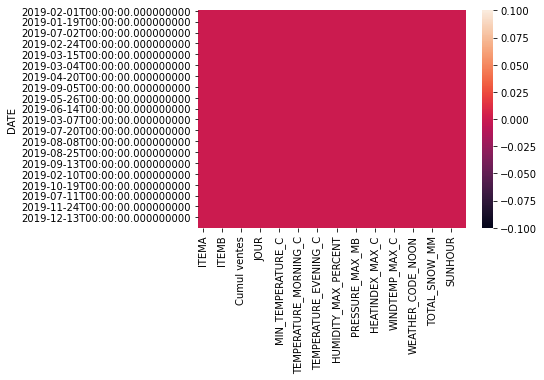

In [13]:
sns.heatmap(df123.isna())

<AxesSubplot:ylabel='None'>

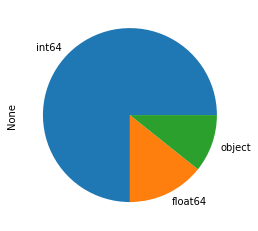

In [14]:
df123.dtypes.value_counts().plot.pie()

In [15]:
df123.isna().sum()

ITEMA                     0
SALESA                    0
ITEMB                     0
SALESB                    0
Cumul ventes              0
MOIS                      0
JOUR                      0
MAX_TEMPERATURE_C         0
MIN_TEMPERATURE_C         0
WINDSPEED_MAX_KMH         0
TEMPERATURE_MORNING_C     0
TEMPERATURE_NOON_C        0
TEMPERATURE_EVENING_C     0
PRECIP_TOTAL_DAY_MM       0
HUMIDITY_MAX_PERCENT      0
VISIBILITY_AVG_KM         0
PRESSURE_MAX_MB           0
CLOUDCOVER_AVG_PERCENT    0
HEATINDEX_MAX_C           0
DEWPOINT_MAX_C            0
WINDTEMP_MAX_C            0
WEATHER_CODE_MORNING      0
WEATHER_CODE_NOON         0
WEATHER_CODE_EVENING      0
TOTAL_SNOW_MM             0
UV_INDEX                  0
SUNHOUR                   0
OPINION                   0
dtype: int64

In [16]:
df123.dtypes

ITEMA                      object
SALESA                      int64
ITEMB                      object
SALESB                      int64
Cumul ventes                int64
MOIS                        int64
JOUR                        int64
MAX_TEMPERATURE_C           int64
MIN_TEMPERATURE_C           int64
WINDSPEED_MAX_KMH           int64
TEMPERATURE_MORNING_C       int64
TEMPERATURE_NOON_C          int64
TEMPERATURE_EVENING_C       int64
PRECIP_TOTAL_DAY_MM       float64
HUMIDITY_MAX_PERCENT        int64
VISIBILITY_AVG_KM         float64
PRESSURE_MAX_MB             int64
CLOUDCOVER_AVG_PERCENT    float64
HEATINDEX_MAX_C             int64
DEWPOINT_MAX_C              int64
WINDTEMP_MAX_C              int64
WEATHER_CODE_MORNING        int64
WEATHER_CODE_NOON           int64
WEATHER_CODE_EVENING        int64
TOTAL_SNOW_MM               int64
UV_INDEX                    int64
SUNHOUR                   float64
OPINION                    object
dtype: object

In [17]:
df123.dtypes.value_counts()

int64      21
float64     4
object      3
dtype: int64

In [18]:
df123.duplicated().sum()

0

In [19]:
#question 2 : d'abord vérification des correlation entre le cumul vente et le fichier meteo de chaque ville
#Transformer à l'aide de la fonction replace  les indicateurs d'opinion en valeur numérique pour ensuite faire de la data analyse
#BORDEAUX et MARSEILLE ont les coefficient de correlation le plus elevé en fonction du cumul vente et l'opinion meteo
#En effet Bernardo nous explique qu'il y a une correlation
#nous analysons les autres coefficient entre ces deux villes pour identifier plus largement les autres indicateurs
#BORDEAUX présente le plus de corrélation, nous concluons que la boutique se situe dans cette ville

In [20]:
#visualisation de la target Opinion

In [21]:
df123['OPINION'].value_counts()

météo favorable           86
météo défavorable         84
météo correcte            57
météo très défavorable    24
météo idéale               9
Name: OPINION, dtype: int64

In [22]:
df123 = pd.merge(df12, df3, on='DATE', how='inner')

In [23]:
##opinion meteo BORDEAUX

<AxesSubplot:>

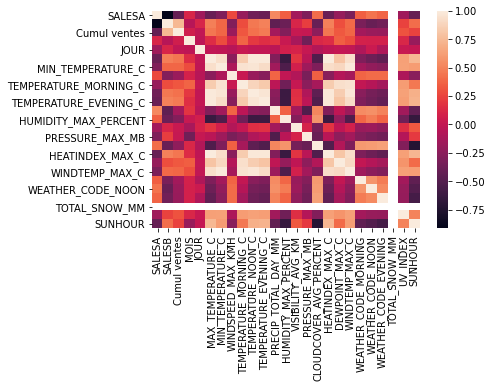

In [24]:
sns.heatmap(df123.corr())

In [25]:
np.corrcoef(df123['Cumul ventes'], df123['TEMPERATURE_EVENING_C'])

array([[1.       , 0.4645739],
       [0.4645739, 1.       ]])

C:\Users\perso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cumul ventes', ylabel='TEMPERATURE_EVENING_C'>

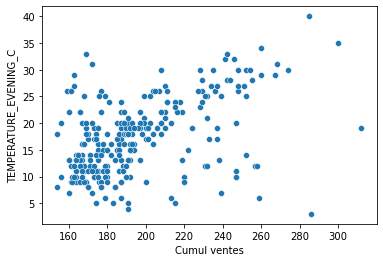

In [26]:
sns.scatterplot(df123['Cumul ventes'], df123['TEMPERATURE_EVENING_C'])

In [27]:
#mise en avant de la variable vitesse du vent> faible correlation à bordeaux

In [28]:
df = df123.drop(['MOIS','JOUR','PRECIP_TOTAL_DAY_MM', 'VISIBILITY_AVG_KM','PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT','WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM','UV_INDEX', 'SUNHOUR','WEATHER_CODE_MORNING','HUMIDITY_MAX_PERCENT'], axis=1)
df_opinion3= df.replace(['météo très défavorable','météo défavorable','météo correcte','météo favorable','météo idéale'],[0,1,2,3,4])
df_opinion3.corr()

,SALESA,SALESB,Cumul ventes,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,OPINION
SALESA,1.000000,-0.914377,-0.411855,-0.395318,-0.293953,0.273759,-0.192233,-0.367251,-0.397866,-0.401813,-0.200374,-0.311605,-0.443558
SALESB,-0.914377,1.000000,0.745522,0.490153,0.386630,-0.280258,0.284469,0.460135,0.497404,0.493664,0.292141,0.398815,0.456270
Cumul ventes,-0.411855,0.745522,1.000000,0.452449,0.386308,-0.180134,0.323820,0.431088,0.464574,0.449660,0.327685,0.384675,0.296773
MAX_TEMPERATURE_C,-0.395318,0.490153,0.452449,1.000000,0.932709,-0.245646,0.840144,0.985795,0.988149,0.993644,0.802689,0.936192,0.746510
MIN_TEMPERATURE_C,-0.293953,0.386630,0.386308,0.932709,1.000000,-0.093877,0.952412,0.967235,0.918702,0.926720,0.901726,0.991839,0.627463
WINDSPEED_MAX_KMH,0.273759,-0.280258,-0.180134,-0.245646,-0.093877,1.000000,0.022570,-0.187376,-0.261786,-0.250802,-0.063908,-0.126342,-0.237878
TEMPERATURE_MORNING_C,-0.192233,0.284469,0.323820,0.840144,0.952412,0.022570,1.000000,0.884182,0.832188,0.837342,0.932891,0.947690,0.479040
TEMPERATURE_NOON_C,-0.367251,0.460135,0.431088,0.985795,0.967235,-0.187376,0.884182,1.000000,0.968107,0.979569,0.843337,0.971065,0.719591
TEMPERATURE_EVENING_C,-0.397866,0.497404,0.464574,0.988149,0.918702,-0.261786,0.832188,0.968107,1.000000,0.983529,0.799850,0.922690,0.729319
HEATINDEX_MAX_C,-0.401813,0.493664,0.449660,0.993644,0.926720,-0.250802,0.837342,0.979569,0.983529,1.000000,0.806352,0.930857,0.737192


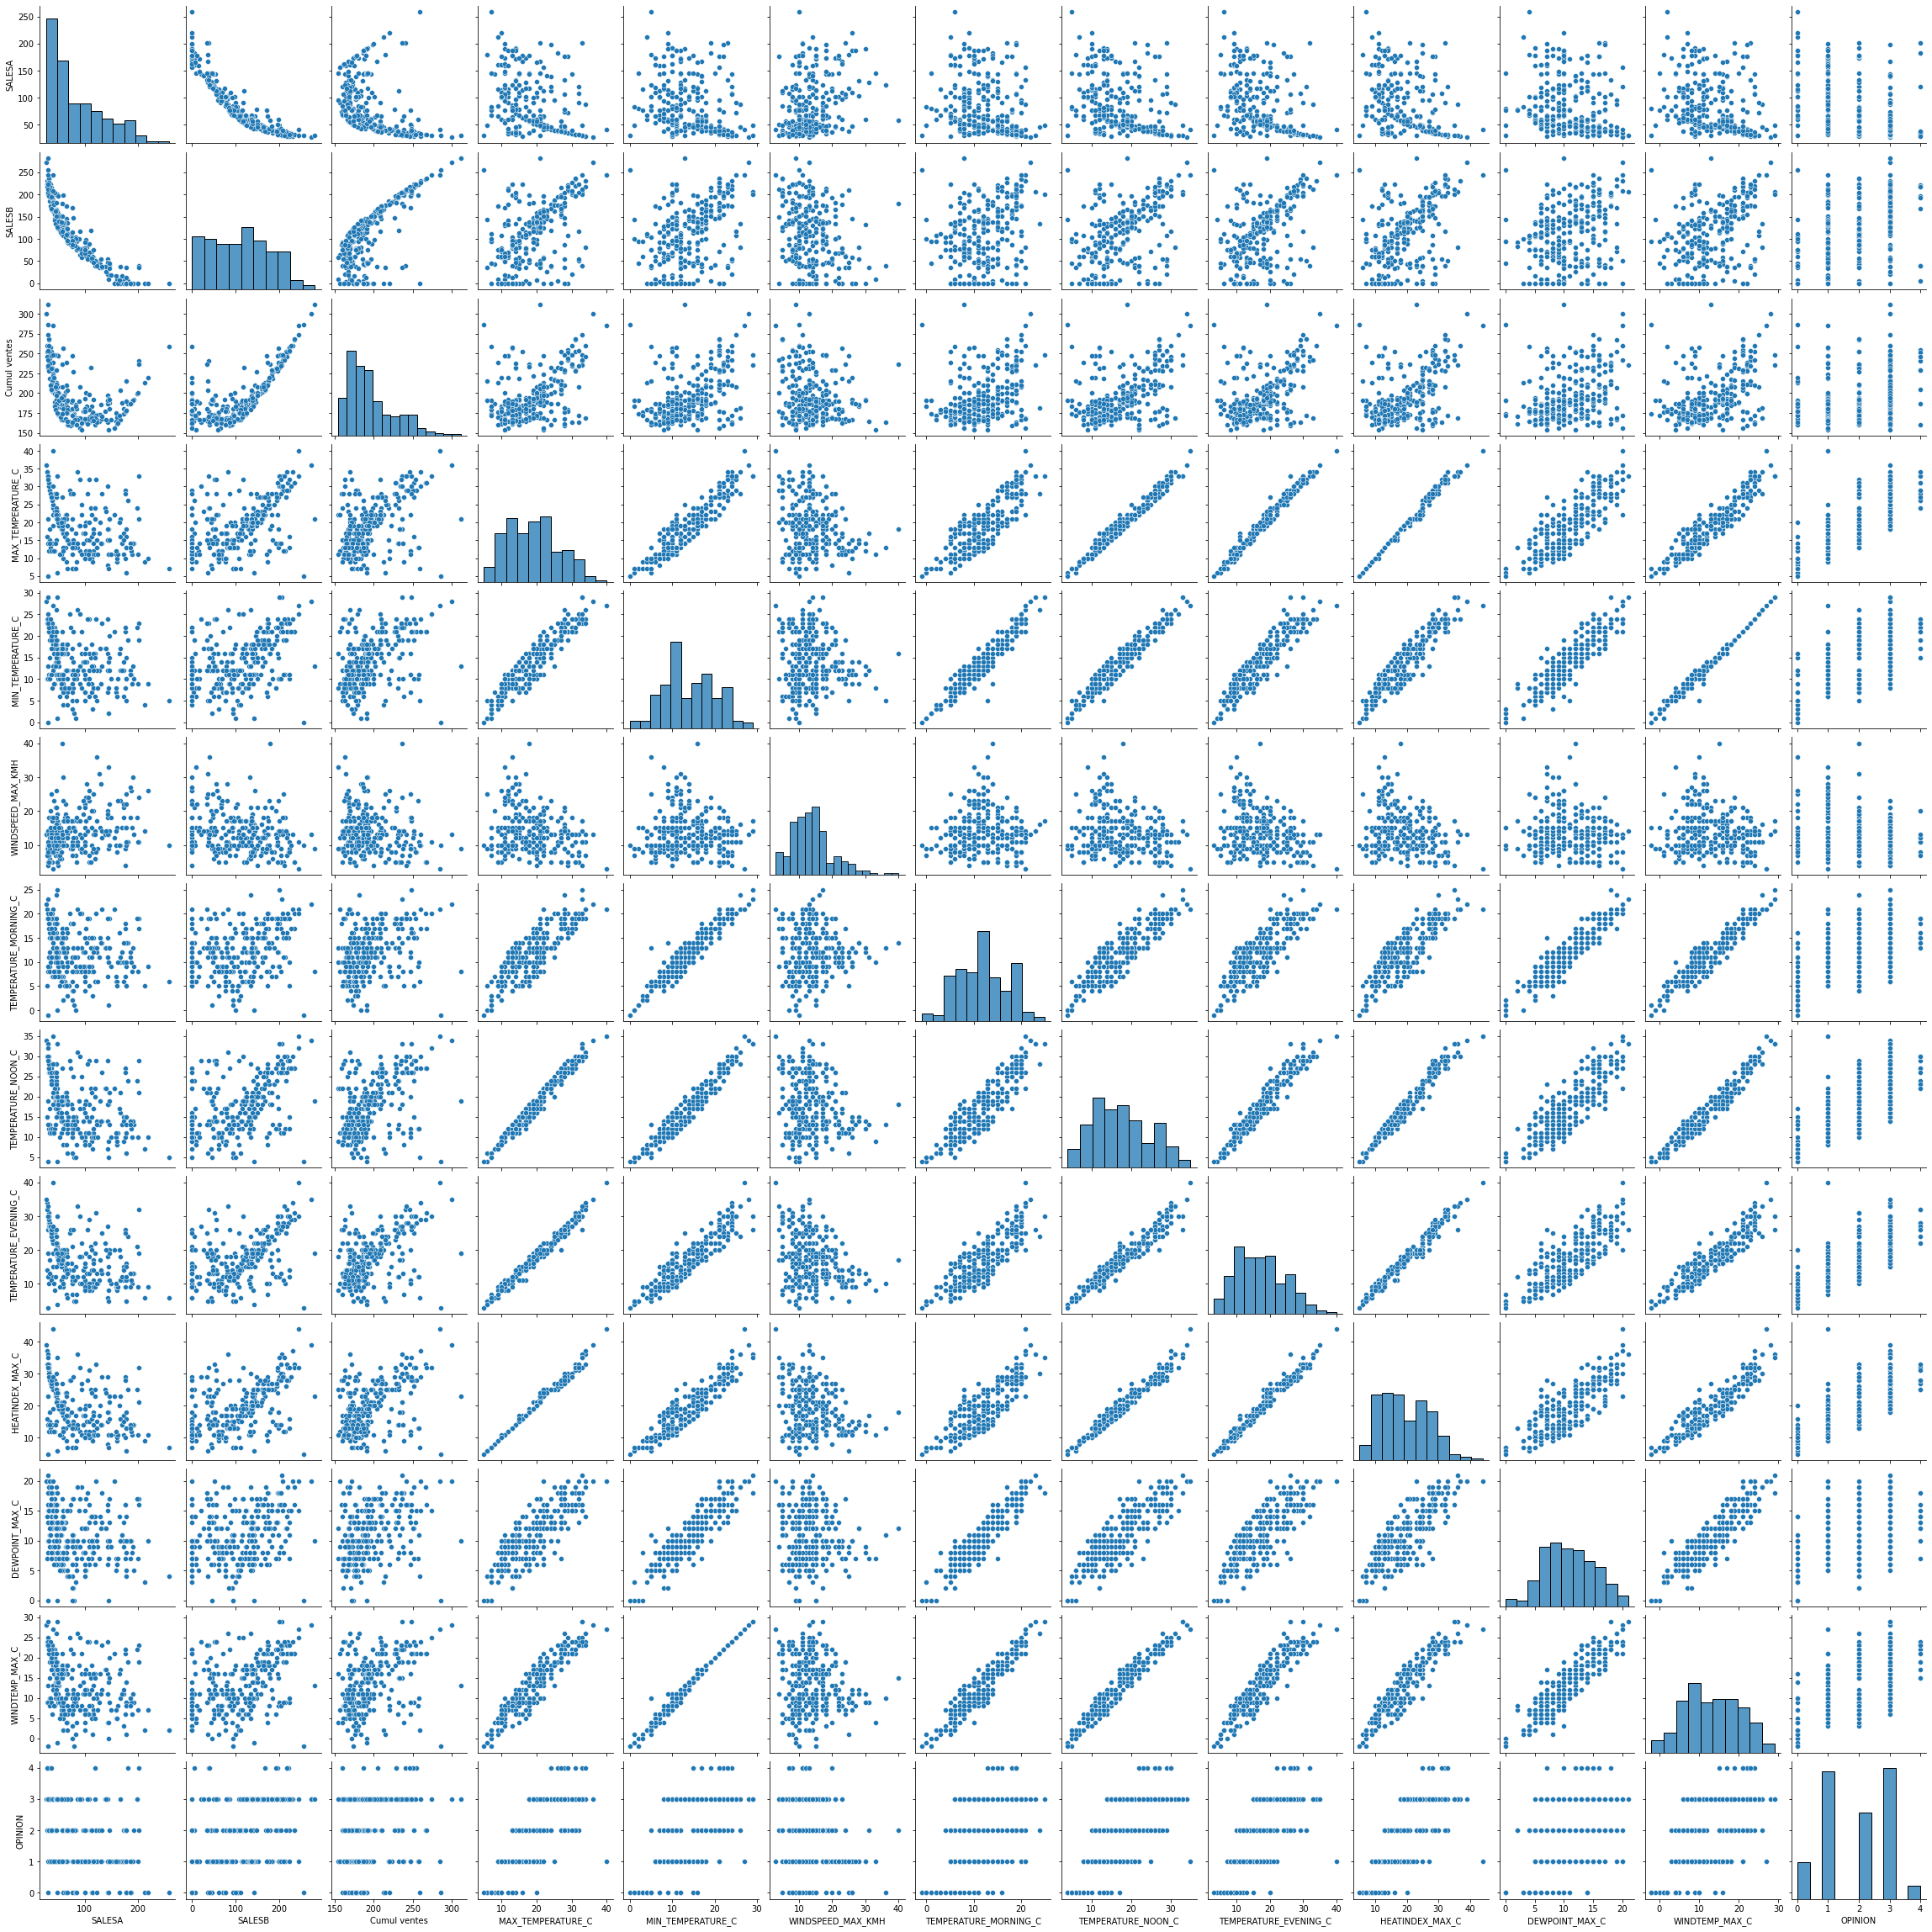

In [29]:
sns.pairplot(df_opinion3)

In [30]:
df = df123.drop(['TOTAL_SNOW_MM','MOIS','JOUR','UV_INDEX','TEMPERATURE_NOON_C','DEWPOINT_MAX_C','TEMPERATURE_EVENING_C','HEATINDEX_MAX_C','MAX_TEMPERATURE_C','MIN_TEMPERATURE_C','TEMPERATURE_MORNING_C','WINDTEMP_MAX_C','OPINION'], axis=1)
df.corr()

,SALESA,SALESB,Cumul ventes,WINDSPEED_MAX_KMH,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,SUNHOUR
SALESA,1.000000,-0.914377,-0.411855,0.273759,0.522519,0.356114,-0.137895,-0.296591,0.410263,0.354451,0.436626,0.373392,-0.410952
SALESB,-0.914377,1.000000,0.745522,-0.280258,-0.440883,-0.386684,0.112948,0.224537,-0.402059,-0.323245,-0.399750,-0.353925,0.409978
Cumul ventes,-0.411855,0.745522,1.000000,-0.180134,-0.132158,-0.284102,0.027218,0.017134,-0.229568,-0.144054,-0.180972,-0.181926,0.246258
WINDSPEED_MAX_KMH,0.273759,-0.280258,-0.180134,1.000000,0.377246,-0.002698,-0.070312,-0.320753,0.361309,0.376948,0.407056,0.408643,-0.249473
PRECIP_TOTAL_DAY_MM,0.522519,-0.440883,-0.132158,0.377246,1.000000,0.371249,-0.140470,-0.515869,0.517458,0.537224,0.559867,0.500483,-0.431564
HUMIDITY_MAX_PERCENT,0.356114,-0.386684,-0.284102,-0.002698,0.371249,1.000000,-0.271987,-0.037123,0.576854,0.379823,0.472927,0.376111,-0.644833
VISIBILITY_AVG_KM,-0.137895,0.112948,0.027218,-0.070312,-0.140470,-0.271987,1.000000,0.101488,-0.334652,-0.187102,-0.172656,-0.222314,0.331807
PRESSURE_MAX_MB,-0.296591,0.224537,0.017134,-0.320753,-0.515869,-0.037123,0.101488,1.000000,-0.391008,-0.272212,-0.324696,-0.364406,0.210069
CLOUDCOVER_AVG_PERCENT,0.410263,-0.402059,-0.229568,0.361309,0.517458,0.576854,-0.334652,-0.391008,1.000000,0.602091,0.616530,0.635725,-0.726838
WEATHER_CODE_MORNING,0.354451,-0.323245,-0.144054,0.376948,0.537224,0.379823,-0.187102,-0.272212,0.602091,1.000000,0.575877,0.475658,-0.438111


In [31]:
#Question 3, après avoir localisé la boutique, nous nous interessons à la corrélation entre les différents indicateurs du fichier mete
# nous distinguons que pour le produit B, les indicateurs les plus corrélées aux ventes sont :la température en soirée, température max au cours de la journée, l'indice de chaleur et la température à midi 
#celles qui sont le moins corrélées pour le produit B sont: les précipitations du jour et la vitesse du vent
#enfin, Bernardo a raison, les ventes du produit A sont impactés par le vent

In [32]:
##opinion meteo LILLE

In [33]:
df124 = pd.merge(df12, df4, on='DATE', how='inner')

<AxesSubplot:>

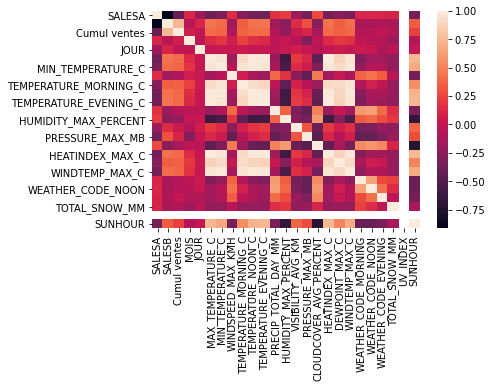

In [34]:
sns.heatmap(df124.corr())

,SALESA,SALESB,Cumul ventes,MOIS,JOUR,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,HUMIDITY_MAX_PERCENT,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,OPINION
SALESA,1.000000,-0.914377,-0.411855,0.111039,-0.157625,-0.355837,-0.319501,0.149142,-0.267080,0.217486,-0.334802,0.114628,-0.321952
SALESB,-0.914377,1.000000,0.745522,-0.050460,0.112485,0.439506,0.401786,-0.144417,0.354439,-0.249883,0.414768,-0.114616,0.358866
Cumul ventes,-0.411855,0.745522,1.000000,0.069219,-0.006305,0.403448,0.378366,-0.079531,0.358092,-0.204405,0.382395,-0.069272,0.277728
MOIS,0.111039,-0.050460,0.069219,1.000000,-0.021128,0.133094,0.185153,0.064767,0.232536,0.011902,0.173929,-0.016345,0.036213
JOUR,-0.157625,0.112485,-0.006305,-0.021128,1.000000,0.014256,0.015434,0.026191,0.037772,0.026340,0.014417,0.040511,0.031804
MAX_TEMPERATURE_C,-0.355837,0.439506,0.403448,0.133094,0.014256,1.000000,0.966923,-0.144589,0.911369,-0.604732,0.968211,-0.281130,0.810650
MIN_TEMPERATURE_C,-0.319501,0.401786,0.378366,0.185153,0.015434,0.966923,1.000000,-0.039827,0.967933,-0.546942,0.991011,-0.202104,0.754290
WINDSPEED_MAX_KMH,0.149142,-0.144417,-0.079531,0.064767,0.026191,-0.144589,-0.039827,1.000000,0.062275,0.173770,-0.121276,0.377645,-0.219203
TEMPERATURE_MORNING_C,-0.267080,0.354439,0.358092,0.232536,0.037772,0.911369,0.967933,0.062275,1.000000,-0.444942,0.953524,-0.071500,0.672264
HUMIDITY_MAX_PERCENT,0.217486,-0.249883,-0.204405,0.011902,0.026340,-0.604732,-0.546942,0.173770,-0.444942,1.000000,-0.539224,0.348282,-0.645178


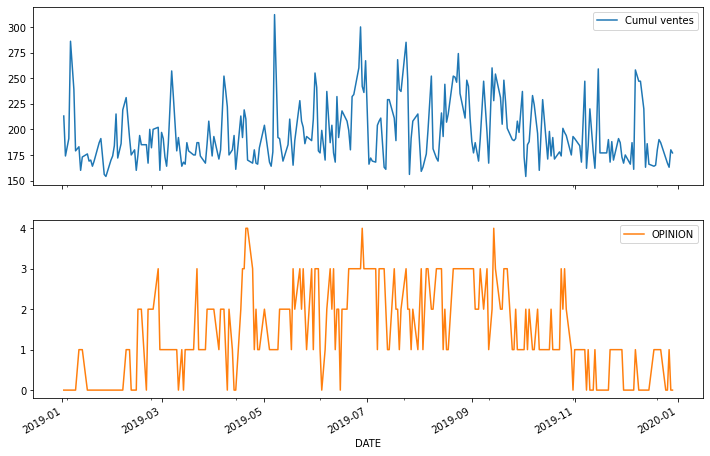

In [35]:
df = df124.drop(['TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C','PRECIP_TOTAL_DAY_MM', 'VISIBILITY_AVG_KM','PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C','DEWPOINT_MAX_C','WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM','UV_INDEX', 'SUNHOUR'], axis=1)
df_opinion4= df.replace(['météo très défavorable','météo défavorable','météo correcte','météo favorable','météo idéale'],[0,1,2,3,4])
df_opinion4[['Cumul ventes','OPINION']].plot(subplots=True, figsize=(12,8))
df_opinion4.corr()

In [36]:
#opinion meteo LYON

In [37]:
df125 = pd.merge(df12, df5, on='DATE', how='inner')

<AxesSubplot:>

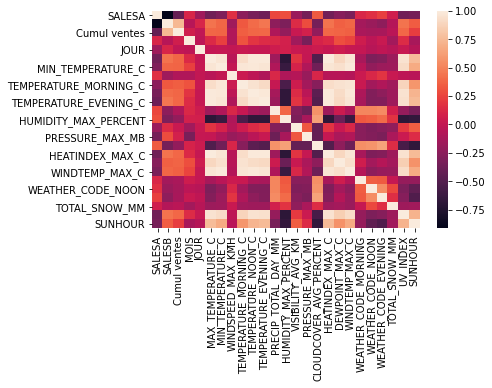

In [38]:
sns.heatmap(df125.corr())

,SALESA,SALESB,Cumul ventes,MOIS,JOUR,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,HUMIDITY_MAX_PERCENT,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,OPINION
SALESA,1.000000,-0.914377,-0.411855,0.111039,-0.157625,-0.357417,-0.299816,0.162742,-0.238848,0.294612,-0.309106,0.120657,-0.331247
SALESB,-0.914377,1.000000,0.745522,-0.050460,0.112485,0.431675,0.384742,-0.156302,0.330454,-0.306680,0.385947,-0.136546,0.349004
Cumul ventes,-0.411855,0.745522,1.000000,0.069219,-0.006305,0.383220,0.372407,-0.083894,0.350584,-0.205276,0.359827,-0.108707,0.240230
MOIS,0.111039,-0.050460,0.069219,1.000000,-0.021128,0.139064,0.236208,-0.083042,0.308697,0.080502,0.259149,0.056794,0.085658
JOUR,-0.157625,0.112485,-0.006305,-0.021128,1.000000,0.010811,0.019591,0.000030,0.033291,0.074621,0.017174,0.006411,-0.014903
MAX_TEMPERATURE_C,-0.357417,0.431675,0.383220,0.139064,0.010811,1.000000,0.969174,-0.046750,0.926784,-0.691136,0.967133,-0.119319,0.752681
MIN_TEMPERATURE_C,-0.299816,0.384742,0.372407,0.236208,0.019591,0.969174,1.000000,0.003360,0.976665,-0.629259,0.991788,-0.044432,0.677070
WINDSPEED_MAX_KMH,0.162742,-0.156302,-0.083894,-0.083042,0.000030,-0.046750,0.003360,1.000000,0.039298,-0.086761,-0.067632,0.035975,-0.047070
TEMPERATURE_MORNING_C,-0.238848,0.330454,0.350584,0.308697,0.033291,0.926784,0.976665,0.039298,1.000000,-0.534935,0.966716,0.030261,0.603189
HUMIDITY_MAX_PERCENT,0.294612,-0.306680,-0.205276,0.080502,0.074621,-0.691136,-0.629259,-0.086761,-0.534935,1.000000,-0.618566,0.331297,-0.660276


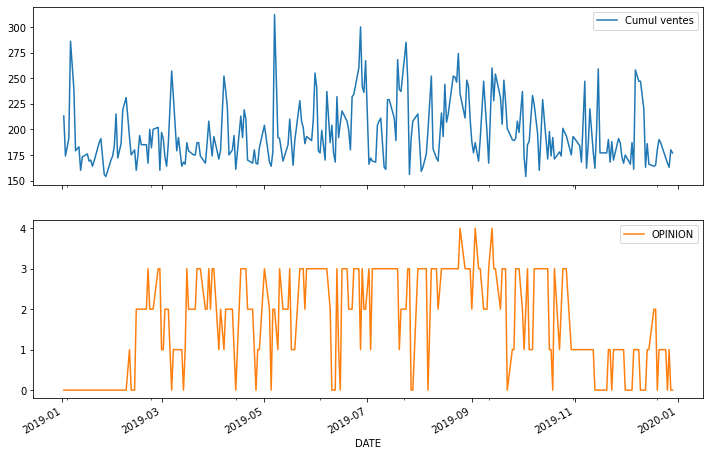

In [39]:
df = df125.drop(['TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C','PRECIP_TOTAL_DAY_MM', 'VISIBILITY_AVG_KM','PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C','DEWPOINT_MAX_C','WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM','UV_INDEX', 'SUNHOUR'], axis=1)
df_opinion5= df.replace(['météo très défavorable','météo défavorable','météo correcte','météo favorable','météo idéale'],[0,1,2,3,4])
df_opinion5[['Cumul ventes','OPINION']].plot(subplots=True, figsize=(12,8))
df_opinion5.corr()


In [40]:
#opinion meteo MARSEILLE

In [41]:
df126 = pd.merge(df12, df6, on='DATE', how='inner')

<AxesSubplot:>

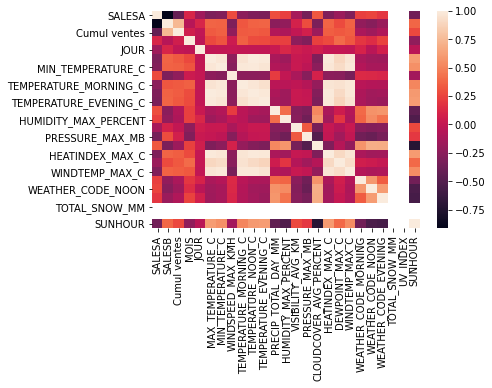

In [42]:
sns.heatmap(df126.corr())

,SALESA,SALESB,Cumul ventes,MOIS,JOUR,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,HUMIDITY_MAX_PERCENT,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,OPINION
SALESA,1.000000,-0.914377,-0.411855,0.111039,-0.157625,-0.306493,-0.282107,0.278994,-0.238367,0.232434,-0.287963,0.230134,-0.399188
SALESB,-0.914377,1.000000,0.745522,-0.050460,0.112485,0.376078,0.365130,-0.302464,0.326198,-0.212046,0.367932,-0.213677,0.422654
Cumul ventes,-0.411855,0.745522,1.000000,0.069219,-0.006305,0.341917,0.357417,-0.221498,0.341796,-0.094636,0.354085,-0.102091,0.294154
MOIS,0.111039,-0.050460,0.069219,1.000000,-0.021128,0.270520,0.318255,0.048265,0.361370,0.236290,0.333304,0.195596,0.109255
JOUR,-0.157625,0.112485,-0.006305,-0.021128,1.000000,-0.004018,-0.000048,0.012247,-0.001473,0.119158,-0.006891,0.095215,-0.012032
MAX_TEMPERATURE_C,-0.306493,0.376078,0.341917,0.270520,-0.004018,1.000000,0.975295,-0.231934,0.961587,-0.166134,0.969235,-0.101512,0.735514
MIN_TEMPERATURE_C,-0.282107,0.365130,0.357417,0.318255,-0.000048,0.975295,1.000000,-0.262294,0.977757,-0.109060,0.982758,-0.067585,0.684993
WINDSPEED_MAX_KMH,0.278994,-0.302464,-0.221498,0.048265,0.012247,-0.231934,-0.262294,1.000000,-0.244924,0.005252,-0.323773,0.137664,-0.237247
TEMPERATURE_MORNING_C,-0.238367,0.326198,0.341796,0.361370,-0.001473,0.961587,0.977757,-0.244924,1.000000,-0.044068,0.978788,-0.039629,0.644749
HUMIDITY_MAX_PERCENT,0.232434,-0.212046,-0.094636,0.236290,0.119158,-0.166134,-0.109060,0.005252,-0.044068,1.000000,-0.088740,0.378652,-0.328619


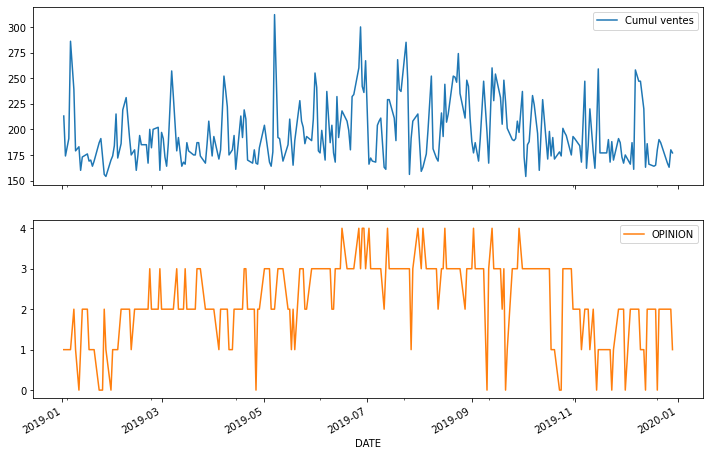

In [43]:
df = df126.drop(['TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C','PRECIP_TOTAL_DAY_MM', 'VISIBILITY_AVG_KM','PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C','DEWPOINT_MAX_C','WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM','UV_INDEX', 'SUNHOUR'], axis=1)
df_opinion6= df.replace(['météo très défavorable','météo défavorable','météo correcte','météo favorable','météo idéale'],[0,1,2,3,4])
df_opinion6[['Cumul ventes','OPINION']].plot(subplots=True, figsize=(12,8))
df_opinion6.corr()


In [44]:
#nous concluons que la boutique est situé est Bordeaux, indicateur de correlation d'opinion + temperature sont supérieure à toutes les autres villes = VISUALISATION DE LA VENTE B EN PARTICULIE

In [45]:
#faire une fonction avec <30% de correlation pour garder uniquement les valeurs significatives et ensuite mettre à
#0 les valeurs inférieures ; puis utiliser la fonction dropna

In [46]:
#REGRESSION AVEC SKLEARN

In [ ]:
sns.scatterplot(df123['SALESA'], df123['WINDSPEED_MAX_KMH'])

In [ ]:
df_opinion3.corr()

In [ ]:
#entrainement pour les ventes A en fonction du parametre WINDSPEED_MAX_KMH
#entrainement pour les ventes B en fonction des parametres MAX_TEMPERATURE_C, TEMPERATURE_EVENING_C, HEATINDEX_MAX_C

In [ ]:
x = df_opinion3['SALESA']
y = df_opinion3.drop(['SALESA','SALESB','Cumul ventes'],axis=1, inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(x, y)
model.score(x, y)